In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, LeakyReLU
from keras.optimizers import Adam

In [2]:
df = pd.read_csv('nvda_options_data.csv')
df = df.dropna()

In [3]:
X = df[['strike', 'IV','Stock_Price', 'Time_to_Expire','Risk_Free_Rate']]
y = df[['CallPrice']]
X.head()

,strike,IV,Stock_Price,Time_to_Expire,Risk_Free_Rate
0,5.0,0.566315,117.889999,1.820671,0.0422
1,10.0,0.566315,117.889999,1.820671,0.0422
2,15.0,0.566315,117.889999,1.820671,0.0422
3,20.0,0.566315,117.889999,1.820671,0.0422
4,25.0,0.566315,117.889999,1.820671,0.0422


In [4]:
X.head()

,strike,IV,Stock_Price,Time_to_Expire,Risk_Free_Rate
0,5.0,0.566315,117.889999,1.820671,0.0422
1,10.0,0.566315,117.889999,1.820671,0.0422
2,15.0,0.566315,117.889999,1.820671,0.0422
3,20.0,0.566315,117.889999,1.820671,0.0422
4,25.0,0.566315,117.889999,1.820671,0.0422


In [5]:
print(f"X shape: {X.shape}, Y shape: {y.shape}")    

X shape: (50, 5), Y shape: (50, 1)


In [6]:
X = StandardScaler().fit_transform(X)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=500)

In [8]:
X_train, y_train = tf.convert_to_tensor(X_train, dtype=tf.float32), tf.convert_to_tensor(y_train, dtype=tf.float32)
X_test, y_test = tf.convert_to_tensor(X_test, dtype=tf.float32), tf.convert_to_tensor(y_test, dtype=tf.float32)

2025-03-20 13:48:59.903130: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3
2025-03-20 13:48:59.903162: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-03-20 13:48:59.903167: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2025-03-20 13:48:59.903197: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-03-20 13:48:59.903208: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [9]:
# Hyperparams
n_units = X_train.shape[1]
n1_units = 400
layers = 4

In [10]:
model = Sequential()
model.add(Dense(n_units, input_dim=X_train.shape[1]))
model.add(LeakyReLU())
for _ in range(layers - 1):
    model.add(Dense(n1_units))
    model.add(LeakyReLU())

model.add(Dense(1, activation='relu'))

/Users/aadityatrivedee/tf_lib/env/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 5)              │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 5)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 400)            │         2,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 400)            │       160,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 400)            │       160,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │           401 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 323,631 (1.23 MB)

 Trainable params: 323,631 (1.23 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile(loss='mae', optimizer=Adam(learning_rate=0.001))

In [13]:
batch_size = 32
losses = model.fit(X_train, y_train, validation_data=(X_test, y_test),batch_size=batch_size, epochs=30, verbose=1)

Epoch 1/30


2025-03-20 13:49:00.549122: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 261ms/step - loss: 42.8725 - val_loss: 39.8130
Epoch 2/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 42.9740 - val_loss: 39.3245
Epoch 3/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 43.5751 - val_loss: 38.6020
Epoch 4/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 41.5413 - val_loss: 37.5169
Epoch 5/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 40.5886 - val_loss: 35.8920
Epoch 6/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 38.4194 - val_loss: 33.5429
Epoch 7/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 34.9284 - val_loss: 30.3032
Epoch 8/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 33.2522 - val_loss: 25.9341
Epoch 9/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 28.3201 - val_loss: 20.3325
Epoch 10/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 23.7598 - val_loss: 14.0995
Epoch 11/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 15.0656 - val_loss: 6.2820
Epoch 12/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - loss: 6.3635 - val_los

In [14]:
model.evaluate(X_test[:3], y_test[:3],batch_size=batch_size)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 1.1585


1.1585124731063843

In [15]:
model.predict(pd.DataFrame(X_test).iloc[0:3])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


array([[16.361498],
       [31.606623],
       [ 8.356339]], dtype=float32)

In [16]:
pd.DataFrame(y_test).iloc[0:3]

,0
0,17.299999
1,32.599998
2,9.900000


<Axes: >

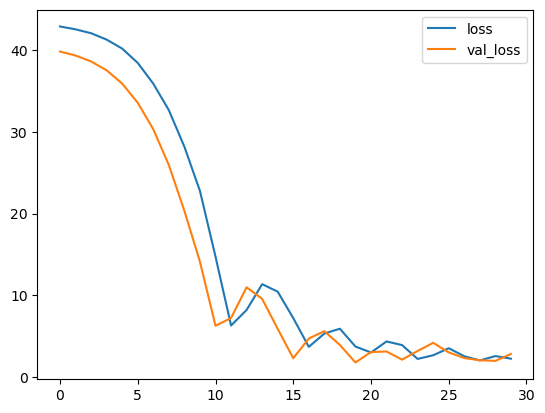

In [17]:
loss_df = pd.DataFrame(losses.history)
loss_df.loc[:,['loss','val_loss']].plot()

In [18]:
def error(x,y):
    error = np.sum(np.abs(model.predict(pd.DataFrame(x)) - pd.DataFrame(y)))*100/(np.sum(np.array(y)))
    return error

In [19]:
print('Mean Square Percentage Error in train:', error(X_train, y_train))
print('Mean Square Percentage Error in test:', error(X_test, y_test))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Mean Square Percentage Error in train: 0    5.603084
dtype: float32
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
Mean Square Percentage Error in test: 0    7.050473
dtype: float32


/Users/aadityatrivedee/tf_lib/env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/Users/aadityatrivedee/tf_lib/env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


In [20]:
def aggregate(data, size=1):
        return np.array([np.mean(data[i:i + size]) for i in range(0, len(data), size)])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


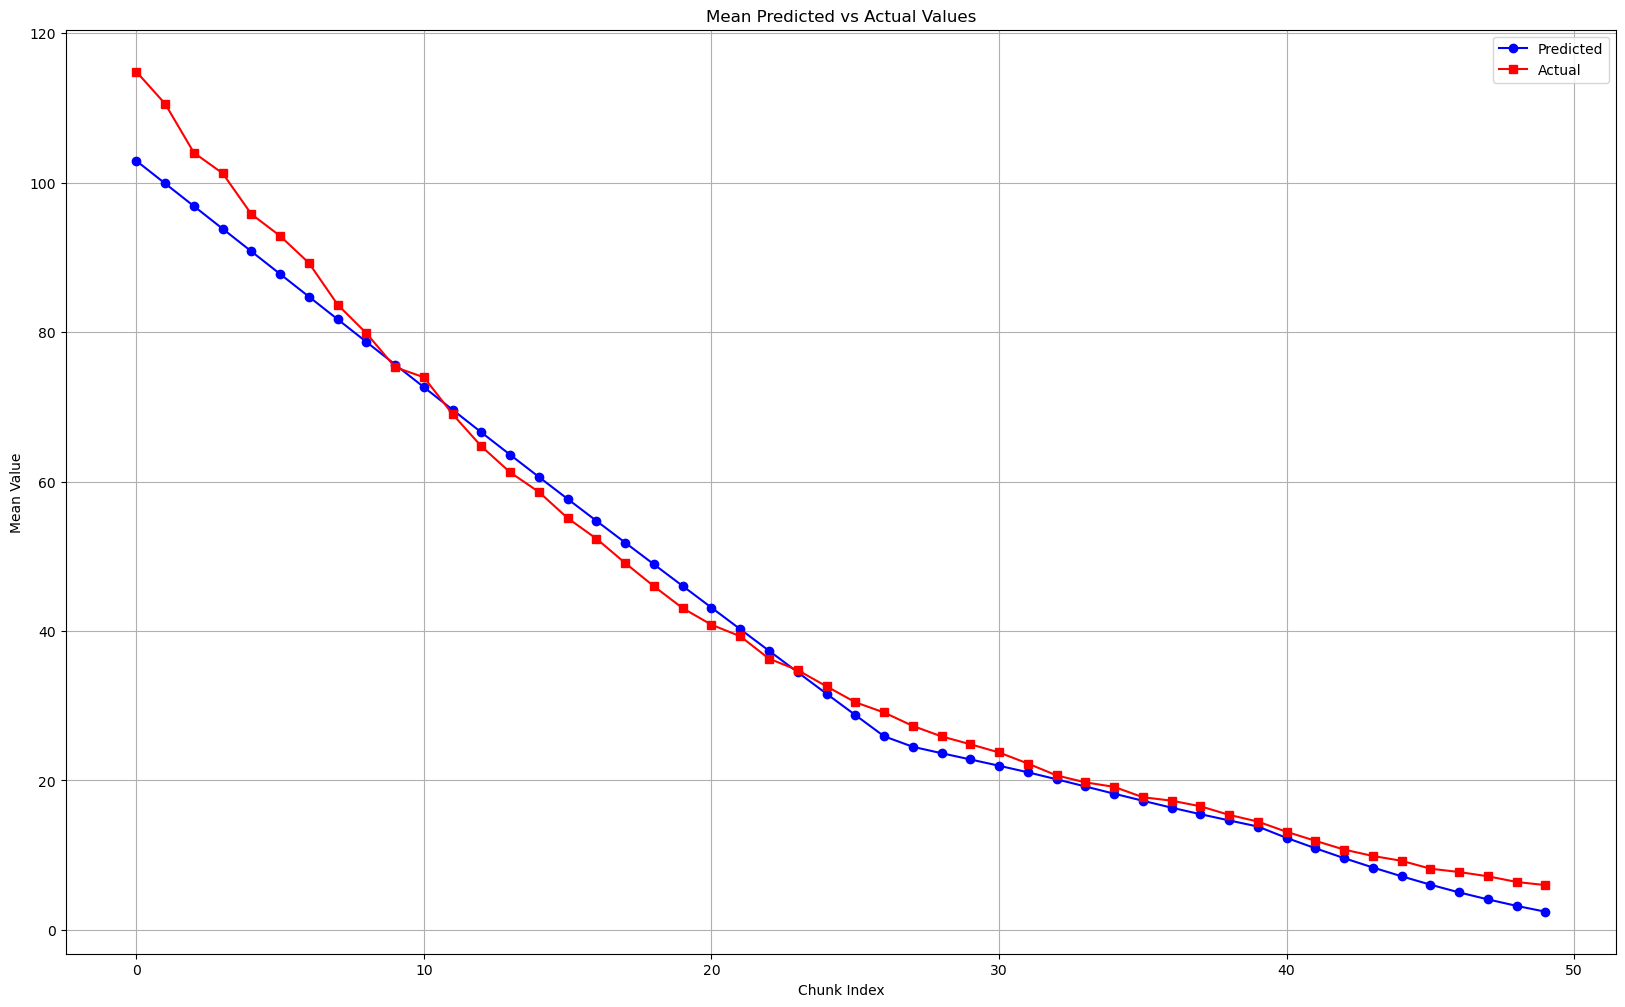

In [24]:
plt.figure(figsize=(20, 12))
X_plt=model.predict(pd.DataFrame(X))
plt.plot(aggregate(X_plt), label='Predicted', marker='o', linestyle='-', color='blue')
plt.plot(aggregate(pd.DataFrame(y)), label='Actual', marker='s', linestyle='-', color='red')
plt.title('Mean Predicted vs Actual Values')
plt.xlabel('Chunk Index')
plt.ylabel('Mean Value')
plt.grid()
plt.legend()
plt.show()

In [23]:
model.save('generalarch_call.h5')